In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
x_train = pd.read_csv('./data/x_train.csv', index_col='id')
y_train = pd.read_csv('./data/y_train.csv', index_col='id')
x_test = pd.read_csv('./data/x_test.csv', index_col='id')

In [52]:
#drop outliers
x_train = x_train.drop(37, axis=0)
y_train = y_train.drop(37, axis=0)

In [53]:
x_train = x_train.reset_index()
x_test = x_test.reset_index()

In [54]:
class_cols = ['Пластификатор', 'Полимер']
continous_cols = list(set(x_train.columns) - set(class_cols))

In [55]:
x_train['Адгезионная добавка'].loc[x_train['Адгезионная добавка'] != 'Отсутствует'] = 1
x_train['Адгезионная добавка'].loc[x_train['Адгезионная добавка'] == 'Отсутствует'] = 0

x_test['Адгезионная добавка'].loc[x_test['Адгезионная добавка'] != 'Отсутствует'] = 1
x_test['Адгезионная добавка'].loc[x_test['Адгезионная добавка'] == 'Отсутствует'] = 0

In [56]:
y_train.columns = ['1', '2', '3', '4', '5']

In [57]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False).fit(x_train[class_cols])

#train
encoded_train = pd.DataFrame(enc.transform(x_train[class_cols]))
x_train_enc = x_train.join(encoded_train, on=encoded_train.index).drop(columns=class_cols)

#test
encoded_test = pd.DataFrame(enc.transform(x_test[class_cols]))
x_test_enc = x_test.join(encoded_test, on=encoded_test.index).drop(columns=class_cols)

In [14]:
# for i in range(8, 12):
#     x_train_enc.iloc[:, i] = x_train_enc.iloc[:, i]*x_train_enc['% массы <Адгезионная добавка>']
    
# for i in range(13, 38):
#     x_train_enc.iloc[:, i] = x_train_enc.iloc[:, i]*x_train_enc['% массы <Пластификатор>']
    
# for i in range(38, 42):
#     x_train_enc.iloc[:, i] = x_train_enc.iloc[:, i]*x_train_enc['% массы <Полимер>']

In [ ]:
# sns.heatmap(np.abs(x_train.iloc[:,:17].corr()))

In [16]:
# important features per target by randforest and Lasso
cols_3 = ['% массы <Базовый битум>',\
                            'Исходная игла при 25С <Базовый битум>',\
                               'Базовая пенетрация для расчёта пластификатора']

cols_2 = ['% массы <Базовый битум>',\
                            '% массы <Пластификатор>',\
                               'Базовая пенетрация для расчёта пластификатора']

cols_1 = cols_2

cols_4 = ['% массы <Полимер>', 
'% массы <Пластификатор>',
'% массы <Базовый битум>']

# important features per target by Ridge and Phisics
cols_1_r = ['% массы <Пластификатор>',
            '% массы <Полимер>',
           'Адгезионная добавка',
            '% массы <Базовый битум>',
            '% массы <Сшивающая добавка>', 'Базовая пенетрация для расчёта пластификатора']

cols_2_r = ['% массы <Пластификатор>',
            '% массы <Полимер>',
           'Адгезионная добавка',
            '% массы <Базовый битум>',
            '% массы <Сшивающая добавка>', 'Базовая пенетрация для расчёта пластификатора']

In [21]:
x_test_enc.shape[1] == x_train_enc.shape[1]

True

In [58]:
#NORMALIzation
from sklearn.preprocessing import Normalizer, StandardScaler
scl = StandardScaler()
norm = Normalizer()
normy = Normalizer()
x_train_std = norm.fit_transform(x_train_enc)
x_train_std = pd.DataFrame(norm.fit_transform(x_train_std))

x_test_std = norm.transform(x_test_enc)
x_test_std = pd.DataFrame(norm.fit_transform(x_test_std))

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import PassiveAggressiveRegressor, TweedieRegressor
from sklearn.pipeline import Pipeline


#code for testing models

# for col in y_train.columns:
#     summean = []
#     for m in range(10):
#         y = y_train[col].dropna()
#         X = x_train_std.loc[y.index]

#         kfold = KFold(n_splits=4, shuffle=True)
#         model = Pipeline([('poly', PolynomialFeatures(degree=3)),
#             ('linear', KNeighborsRegressor(weights='distance', p=1, n_neighbors=20))
#         ])

#         cv = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold, )
#         summean.append(np.mean(cv))
#     print(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold, ))
#     print(np.mean(summean))

In [27]:
# 1 KNN distance 18 -12.26
# 2 KNN distance p1 20 -69.5
# 3 rand for maxd10 -112.97
# 4 l1 polinom3  -11.18
# 5 ridge -30.58

In [61]:
y_train = y_train.reset_index(drop=True)

In [62]:
# Learning final ensamble

In [63]:
y = y_train['1'].dropna()
X = x_train_enc.loc[y.index]
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
            ('linear', Lasso())]).fit(X, y)
preds_1 = model.predict(x_test_enc)

In [64]:
y = y_train['2'].dropna()
X = x_train_enc.loc[y.index]
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
            ('linear', Lasso())]).fit(X, y)
preds_2 = model.predict(x_test_enc)

In [65]:
# code for testing models
# count_1 = []
# count_2 = []
# b = -9.232514450867043
# a = 2.6031791907514448
# for i in range(100):
#     y = y_train['1'].dropna().sample(frac=1).iloc[0:25]
#     X = x_train_std.loc[y.index]
#     model = Ridge().fit(X, y)
#     preds_1 = model.predict(X)
#     count_1.append(mean_squared_error(y, preds_1))
#     preds_2 = a * preds_1 + b
#     count_2.append(mean_squared_error(y_train['2'].fillna(y_train['2'].median()).loc[y.index], preds_2))

# print(np.mean(count_1))
                   
# print(np.mean(count_2))

In [66]:
y = y_train['3'].dropna()
X = x_train_enc.loc[y.index]
model = Ridge().fit(X, y)
preds_3 = model.predict(x_test_enc)

In [67]:
y = y_train['4'].dropna()
X = x_train_enc.loc[y.index]
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
            ('linear', ElasticNet())]).fit(X, y)
preds_4 = model.predict(x_test_enc)

,% массы <Базовый битум>,% массы <Пластификатор>,Базовая пенетрация для расчёта пластификатора
0,90.400,5.900,138
1,90.100,5.900,138
2,90.100,5.900,138
3,90.100,5.900,138
4,89.000,7.000,138
...,...,...,...
102,89.944,5.899,139
103,88.925,6.917,105
104,91.142,5.206,103
105,91.652,4.040,118


In [98]:
y = y_train['5'].dropna()
X = x_train[cols_2].loc[y.index]
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', Lasso())]).fit(X, y)
preds_5 = model.predict(x_test[cols_2])

In [100]:
preds_5

array([82.8783577 , 73.72254346, 77.3550837 , 76.54487145, 75.07445797,
       70.19341474, 71.97992034, 75.29305936, 80.53369176, 78.07697233])

In [ ]:
#preds 3 new
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.linear_model import PassiveAggressiveRegressor, TweedieRegressor
# from sklearn.neural_network import MLPRegressor

# from sklearn.pipeline import Pipeline

# answers = {}


# for col in y_train.columns:
#     summean = []
#     for m in range(1):
#         y = y_train[col].fillna(y_train[col].median())
#         X = x_train_std.loc[y.index]

#         kfold = KFold(n_splits=4, shuffle=True)
#         model = MLPRegressor(solver='sgd', max_iter=1000, activation='tanh',
#                            random_state=1, learning_rate_init=0.005, learning_rate='adaptive',
#                            batch_size=X.shape[0], momentum=0.85, alpha=1)
        
#         cv = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold, )
#         summean.append(np.mean(cv))
        
#         model.fit(X, y)
#         answers[col] = model.predict(x_test_std)
#     print(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold, ))
#     print(np.mean(summean))

# to_name = dict(zip(map(str, range(1, 6)), old.columns[1:]))
# to_name
# ans = {}
# for el_key, el_val in answers.items():
#     el_key_name = to_name[el_key]
#     ans[el_key_name] = el_val
# pd.DataFrame(ans)

# superdata = pd.read_csv('int.csv').drop(columns='id')
# superdata

In [69]:
# preds_5 = [82.36082335, 92.09039274,79.07077935,77.98932238,74.50945446,70.89148063,72.7393402,75.83444471,78.32320262,76.65445571]

In [101]:
preds = pd.DataFrame([preds_1, preds_2, preds_3, preds_4, preds_5]).T
preds.columns = ['Глубина  проникания иглы при 0 °С, [мм-1]',
       'Глубина  проникания иглы при 25 °С, [мм-1]',
       'Растяжимость  при температуре 0 °С, [см]',
       'Температура размягчения, [°С]', 
        'Эластичность при 0 °С, [%]']



In [102]:
preds

,"Глубина проникания иглы при 0 °С, [мм-1]","Глубина проникания иглы при 25 °С, [мм-1]","Растяжимость при температуре 0 °С, [см]","Температура размягчения, [°С]","Эластичность при 0 °С, [%]"
0,32.102647,66.873746,-8.755783,55.659642,82.878358
1,28.812711,63.052313,35.951293,42.162882,73.722543
2,32.747862,64.651415,13.174837,70.753139,77.355084
3,27.495465,61.688229,27.616342,64.512744,76.544871
4,24.954844,64.552373,23.271717,79.418679,75.074458
5,27.188683,49.809868,20.372243,81.468237,70.193415
6,25.819053,33.488140,20.815323,77.806344,71.979920
7,30.955677,40.534526,9.842782,62.663430,75.293059
8,39.545409,75.110713,10.516554,53.747416,80.533692
9,32.293047,47.648947,11.097323,67.577912,78.076972


In [107]:
# to ints
repl = []
old = []
for i in pd.DataFrame(preds).iloc[:, 2].tolist():
    if i > pd.DataFrame(preds).iloc[:, 2].median():
        repl.append(int(i))
    else:
        repl.append(int(i) + 1)

In [1358]:
preds.to_csv('neuralME.csv', index_label='id')

In [22]:
train_x_numeric = train_x.copy(deep=True)


train_x_numeric.iloc[:,6] = pd.Categorical(train_x_numeric.iloc[:,6])
train_x_numeric['code6'] = train_x_numeric.iloc[:,6].cat.codes

train_x_numeric.iloc[:,7] = pd.Categorical(train_x_numeric.iloc[:,7])
train_x_numeric['code7'] = train_x_numeric.iloc[:,7].cat.codes

train_x_numeric.iloc[:,8] = pd.Categorical(train_x_numeric.iloc[:,8])
train_x_numeric['code8'] = train_x_numeric.iloc[:,8].cat.codes


In [23]:
train_x_numeric

,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Адгезионная добавка,Пластификатор,Полимер,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25,code6,code7,code8
id,,,,,,,,,,,,,,
0,0.000,90.400,5.900,3.600,0.100,79,Отсутствует,Plasticizer1,Polymer1,138,75,4,0,0
1,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer2,Polymer2,138,75,0,11,1
2,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer3,Polymer2,138,75,0,18,1
3,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75,0,19,1
4,0.300,89.000,7.000,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.300,89.944,5.899,3.749,0.108,79,Adhesion1,Plasticizer24,Polymer2,139,75,0,16,1
104,0.300,88.925,6.917,3.750,0.108,71,Adhesion1,Plasticizer24,Polymer2,105,75,0,16,1
105,0.293,91.142,5.206,3.270,0.089,72,Adhesion1,Plasticizer24,Polymer2,103,75,0,16,1


In [25]:
train_x_numeric = train_x_numeric.drop(train_x_numeric.columns[[6, 7, 8]], axis=1) 

In [26]:
train_x_numeric

,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25,code6,code7,code8
id,,,,,,,,,,,
0,0.000,90.400,5.900,3.600,0.100,79,138,75,4,0,0
1,0.300,90.100,5.900,3.600,0.100,79,138,75,0,11,1
2,0.300,90.100,5.900,3.600,0.100,79,138,75,0,18,1
3,0.300,90.100,5.900,3.600,0.100,79,138,75,0,19,1
4,0.300,89.000,7.000,3.600,0.100,79,138,75,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...
103,0.300,89.944,5.899,3.749,0.108,79,139,75,0,16,1
104,0.300,88.925,6.917,3.750,0.108,71,105,75,0,16,1
105,0.293,91.142,5.206,3.270,0.089,72,103,75,0,16,1


In [41]:
train_x_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   % массы <Адгезионная добавка>                       108 non-null    float64
 1   % массы <Базовый битум>                             108 non-null    float64
 2   % массы <Пластификатор>                             108 non-null    float64
 3   % массы <Полимер>                                   108 non-null    float64
 4   % массы <Сшивающая добавка>                         108 non-null    float64
 5   Исходная игла при 25С <Базовый битум>               108 non-null    int64  
 6   Базовая пенетрация для расчёта пластификатора       108 non-null    int64  
 7   Расчёт рецептуры на глубину проникания иглы при 25  108 non-null    int64  
 8   code6                                               108 non-null    int8   
 9  

0  :  Глубина  проникания иглы при 0 °С, [мм-1]


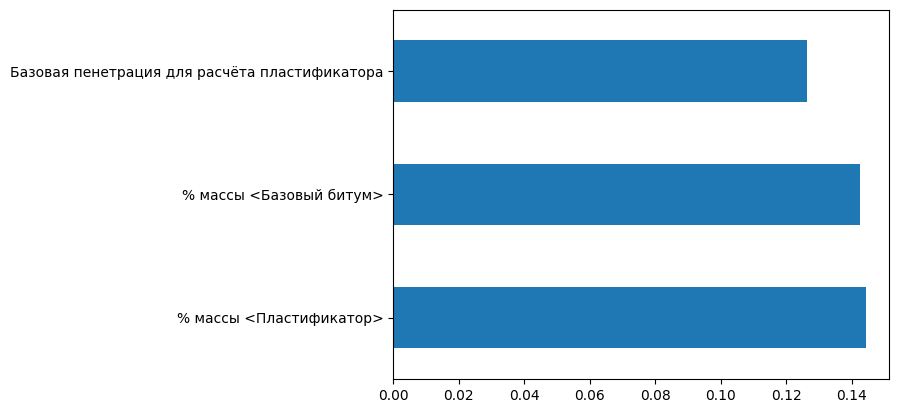

1  :  Глубина  проникания иглы при 25 °С, [мм-1]


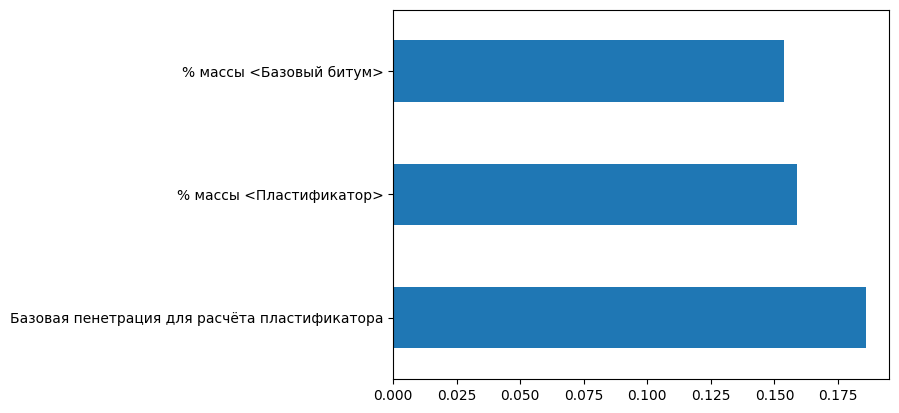

2  :  Растяжимость  при температуре 0 °С, [см]


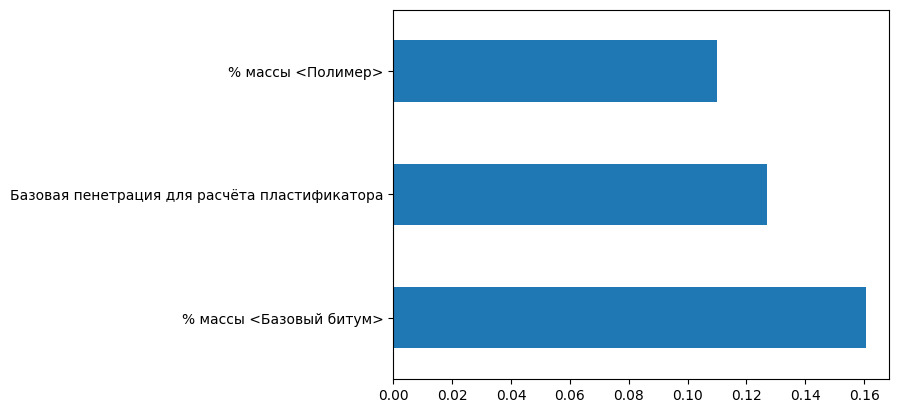

3  :  Температура размягчения, [°С]


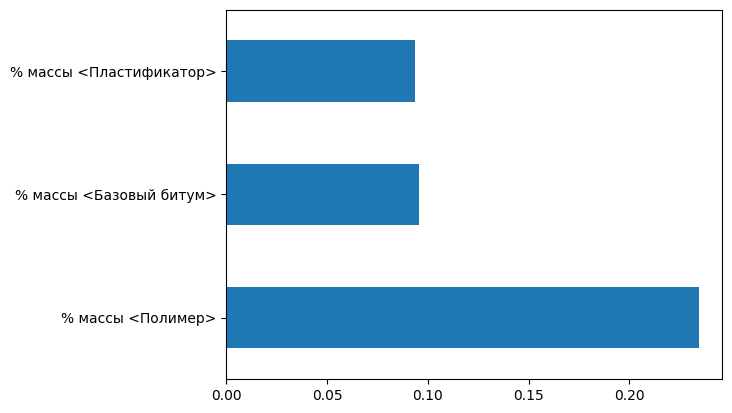

4  :  Эластичность при 0 °С, [%]


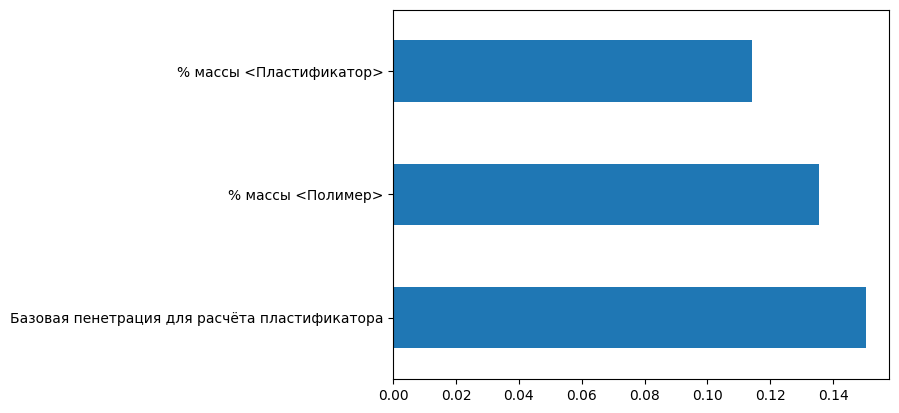

In [95]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
0
import matplotlib.pyplot as plt


train_x_encoded = train_x_encoded.fillna(train_x_encoded.median())
train_y = train_y.fillna(train_y.median())


X = train_x_encoded

for i in range(5):
    print(i," : ", train_y.columns[i])  
    y = train_y.iloc[:,i].values
    model = RandomForestRegressor(criterion="squared_error")
    model.fit(X, y)
    plt.figure()
    pd.Series(model.feature_importances_, index=X.columns).nlargest(3).plot(kind='barh')
    plt.pause(1)


In [123]:
train_y

,"Глубина проникания иглы при 0 °С, [мм-1]","Глубина проникания иглы при 25 °С, [мм-1]","Растяжимость при температуре 0 °С, [см]","Температура размягчения, [°С]","Эластичность при 0 °С, [%]"
id,,,,,
0,33.0,71.0,21.0,74.4,73.0
1,32.0,71.0,16.0,72.8,75.0
2,35.0,76.0,27.0,74.0,78.0
3,30.0,65.0,13.0,75.0,75.0
4,32.0,66.0,14.0,75.0,77.0
...,...,...,...,...,...
103,34.0,71.0,50.0,74.0,NaN
104,32.0,71.0,24.7,74.0,NaN
105,31.0,72.0,24.0,73.0,NaN


In [122]:
train_x

,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Адгезионная добавка,Пластификатор,Полимер,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25,sum
id,,,,,,,,,,,,
0,0.000,90.400,5.900,3.600,0.100,79,Отсутствует,Plasticizer1,Polymer1,138,75,100.0
1,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer2,Polymer2,138,75,100.0
2,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer3,Polymer2,138,75,100.0
3,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75,100.0
4,0.300,89.000,7.000,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.300,89.944,5.899,3.749,0.108,79,Adhesion1,Plasticizer24,Polymer2,139,75,100.0
104,0.300,88.925,6.917,3.750,0.108,71,Adhesion1,Plasticizer24,Polymer2,105,75,100.0
105,0.293,91.142,5.206,3.270,0.089,72,Adhesion1,Plasticizer24,Polymer2,103,75,100.0


In [111]:
train_x['sum'] = train_x_numeric.iloc[:,0:5].sum(axis=1)



In [121]:
train_x['sum'].max()

100.00000000000001